<h1><center><font color='#3D3C3A'> Handling missing values </font></center></h1>
<img src="missing_values.png">

[Dataset](https://drive.google.com/file/d/1TjvAtdw2mz5zKDYJMBUFHqjOhey8u95q/view)


<center><font color='#3D3C3A'> A missing value is a value that is left blank or filled with another value to represent the value is missing, On this Assignment, I used some techniques to deal with the missing values in the dataset. </font></center>

In [555]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [556]:
# Reading dataset
PATH = '/Users/nourahalsaadan/Desktop/Coding_Dojo/Python/day_11/burritos.csv'
df = pd.read_csv(PATH)

In [557]:
# Visually inspec first 5 rows
df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [558]:
# Get the number of entries and columns
df.shape

(423, 66)

In [559]:
# df summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        423 non-null    object 
 1   Burrito         423 non-null    object 
 2   Date            423 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            416 non-null    float64
 10  Hunger          420 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          284 non-null    float64
 14  Circum          282 non-null    float64
 15  Volume          282 non-null    float64
 16  Tortilla        423 non-null    float64
 17  Temp            403 non-null    flo

In [560]:
# Computes a summary of statistics pertaining to df columns.
df.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Queso
count,87.000000,87.000000,416.000000,420.000000,22.000000,22.000000,284.000000,282.000000,282.000000,423.000000,403.000000,409.000000,420.000000,414.000000,421.000000,398.000000,421.000000,420.000000,421.000000,0.0
mean,3.887356,4.167816,7.065216,3.496095,546.181818,0.675277,20.046901,22.131738,0.786489,3.519385,3.780397,3.622249,3.542024,3.589082,3.434086,3.372613,3.587767,3.981190,3.620887,NaN
std,0.475396,0.373698,1.503645,0.811466,144.445619,0.080468,2.084957,1.777526,0.152260,0.793301,0.980044,0.828384,0.801253,0.996292,1.069349,0.922434,0.886277,1.115803,0.755718,NaN
min,2.500000,2.900000,2.990000,0.500000,350.000000,0.560000,15.000000,17.000000,0.400000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,3.500000,4.000000,6.250000,3.000000,450.000000,0.619485,18.500000,21.000000,0.680000,3.000000,3.000000,3.000000,3.000000,3.000000,2.700000,3.000000,3.000000,3.500000,3.100000,NaN
50%,4.000000,4.200000,6.990000,3.500000,540.000000,0.658099,20.000000,22.000000,0.770000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,3.800000,NaN
75%,4.000000,4.400000,7.860000,4.000000,595.000000,0.721726,21.500000,23.000000,0.880000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.100000,NaN
max,4.500000,5.000000,25.000000,5.000000,925.000000,0.865672,26.000000,29.000000,1.540000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN


In [561]:
# Shows a summary of categorical objects in df columns.
df.describe(exclude= 'number')

,Location,Burrito,Date,Neighborhood,Address,URL,Chips,Rec,Reviewer,Notes,...,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
count,423,423,423,92,88,87,26,233,422,146,...,4,4,1,5,3,3,2,13,3,1
unique,108,132,169,41,87,86,4,6,106,145,...,1,1,1,1,1,1,1,1,2,1
top,Taco Villa,California,8/30/2016,Clairemont,9500 Gilman Dr,https://www.yelp.com/biz/el-dorado-mexican-foo...,x,Yes,Scott,Bland,...,x,x,x,x,x,x,x,x,x,x
freq,28,101,29,9,2,2,21,157,147,2,...,4,4,1,5,3,3,2,13,2,1


In [562]:
# Count total NaN at each column 
df.isnull().sum()

Location          0
Burrito           0
Date              0
Neighborhood    331
Address         335
               ... 
Bacon           420
Sushi           421
Avocado         410
Corn            420
Zucchini        422
Length: 66, dtype: int64

In [563]:
# Count total NaN at each row 
for i in range(len(df.index)) :
    print('Total NaN in row', i + 1, ':',
          df.iloc[i].isnull().sum())

Total NaN in row 1 : 39
Total NaN in row 2 : 39
Total NaN in row 3 : 47
Total NaN in row 4 : 46
Total NaN in row 5 : 40
Total NaN in row 6 : 42
Total NaN in row 7 : 41
Total NaN in row 8 : 48
Total NaN in row 9 : 37
Total NaN in row 10 : 42
Total NaN in row 11 : 44
Total NaN in row 12 : 38
Total NaN in row 13 : 46
Total NaN in row 14 : 47
Total NaN in row 15 : 47
Total NaN in row 16 : 38
Total NaN in row 17 : 45
Total NaN in row 18 : 39
Total NaN in row 19 : 49
Total NaN in row 20 : 43
Total NaN in row 21 : 48
Total NaN in row 22 : 40
Total NaN in row 23 : 46
Total NaN in row 24 : 44
Total NaN in row 25 : 44
Total NaN in row 26 : 40
Total NaN in row 27 : 44
Total NaN in row 28 : 41
Total NaN in row 29 : 45
Total NaN in row 30 : 44
Total NaN in row 31 : 42
Total NaN in row 32 : 44
Total NaN in row 33 : 44
Total NaN in row 34 : 47
Total NaN in row 35 : 39
Total NaN in row 36 : 45
Total NaN in row 37 : 45
Total NaN in row 38 : 45
Total NaN in row 39 : 41
Total NaN in row 40 : 47
Total NaN

In [564]:
# Count total NaN 
print('\nCount total NaN in a DataFrame : \n\n',
       df.isnull().sum().sum())


Count total NaN in a DataFrame : 

 18256


<h1><font color='#3D3C3A'>Bar plot before handling missing values</font></h1>

Text(0, 0.5, 'Missing Valuses')

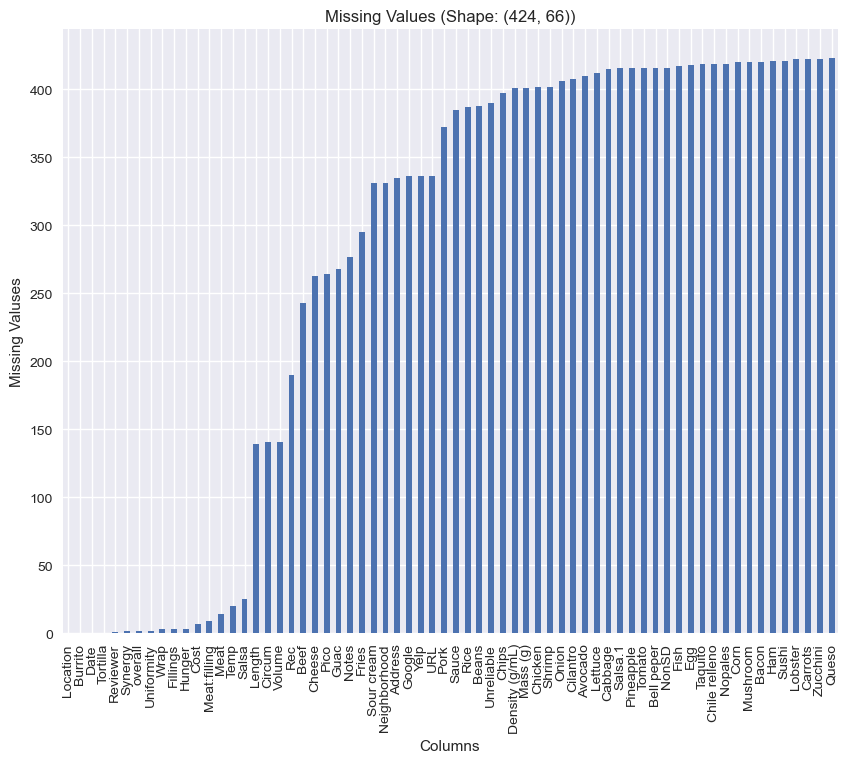

In [565]:
# Look at total NaN values per column graphically
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi = 100)
df.isnull().sum().sort_values().plot(kind='bar', title= 'Missing Values (Shape: (424, 66))');
plt.xlabel('Columns')
plt.ylabel('Missing Valuses')

In [566]:
# Dropping rows only where all values are NaN values
# It looks like there are no rows where all values are NaN
df.dropna(axis = 'index', how = 'all', inplace = True)
df.shape

(423, 66)

~ There are no rows where all values are NaN

In [567]:
# Dropping columns only where all values are NaN values
df.dropna(axis = 'columns', how = 'all', inplace = True)
df.shape

(423, 65)

~ There was one column that has all its' values NaN ~ <font color='#C24641'> ' Queso ' </font>

<h2><font color='#3D3C3A'> Replace NaN values in the Yelp column with the mean </font></h2>

In [568]:
# Get uniqe values in the Yelp column
df['Yelp'].unique()

array([3.5, nan, 4. , 3. , 4.5, 2.5, 4.2])

In [569]:
# Count NaN values in the Yelp column 
df['Yelp'].isnull().sum()

336

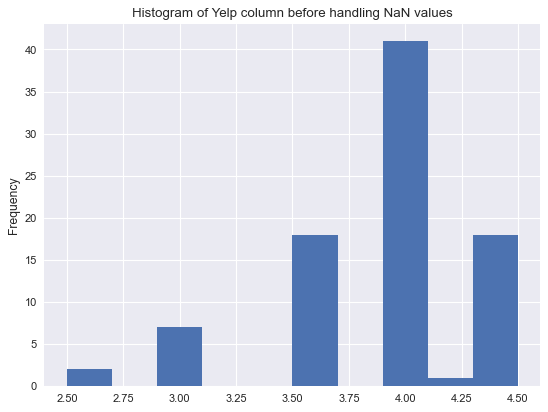

In [570]:
# Plot a histogram for the Yelp column before handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Yelp'].plot(kind="hist", title="Histogram of Yelp column before handling NaN values");

In [571]:
# Calculate the mean
mean = round(df['Yelp'].mean(),1)
mean

3.9

In [572]:
# Replace NaN values with the mean
df['Yelp'] = df['Yelp'].fillna(mean)
df['Yelp'].isnull().sum()

0

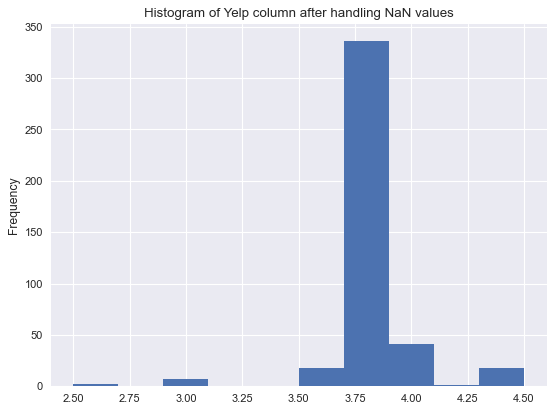

In [573]:
# Plot a histogram for the Yelp column after handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Yelp'].plot(kind="hist", title="Histogram of Yelp column after handling NaN values");

<h2><font color='#3D3C3A'> Replace NaN values in the Length column with the median </font></h2>

In [574]:
# Get uniqe values in the Length column
df['Length'].unique()

array([  nan, 20.  , 19.  , 18.5 , 21.59, 25.  , 23.  , 22.5 , 21.  ,
       16.5 , 17.  , 17.7 , 18.  , 17.5 , 17.78, 21.5 , 22.  , 23.5 ,
       25.5 , 20.5 , 19.5 , 20.75, 15.  , 16.  , 15.5 , 26.  , 24.  ,
       24.5 , 21.3 , 22.2 ])

In [575]:
# Count NaN values in the Length column 
df['Length'].isnull().sum()

139

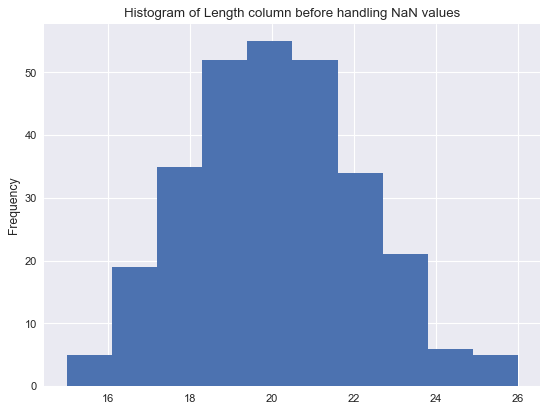

In [576]:
# Plot a histogram for the Length column before handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Length'].plot(kind="hist", title="Histogram of Length column before handling NaN values");

In [577]:
# Calculate the median
median = round(df['Length'].median(),1)
median

20.0

In [578]:
# Replace NaN values with median
df['Length'] = df['Length'].replace(np.NaN, median)

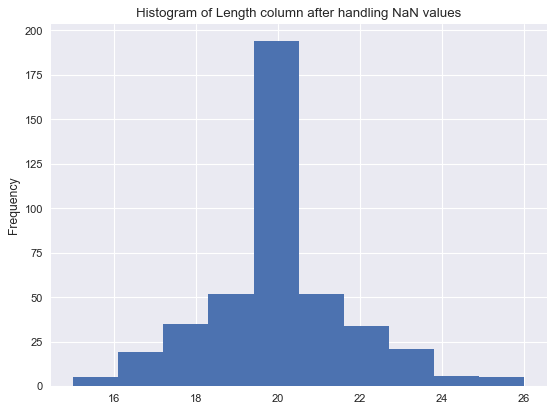

In [579]:
# Plot a histogram for the Length column after handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Length'].plot(kind="hist", title="Histogram of Length column after handling NaN values");

<h2><font color='#3D3C3A'> Replace NaN values in the overall column with the mode </font></h2>

In [580]:
# Get uniqe values in the overall column
df['overall'].unique()

array([3.8    , 3.     , 3.75   , 4.2    , 3.2    , 2.6    , 3.9    ,
       2.     , 2.5    , 2.75   , 4.1    , 4.     , 3.5    , 4.6    ,
       4.5    , 4.25   , 3.4    , 1.     , 3.33333, 3.25   , 4.3    ,
       3.3    , 3.6    , 2.8    , 4.4    , 4.7    , 5.     , 1.5    ,
       1.8    , 4.9    , 3.7    , 2.9    , 4.8    , 2.7    , 2.3    ,
           nan, 2.2    , 2.4    , 3.1    , 2.66   ])

In [581]:
# Count NaN values in the overall column 
df['overall'].isnull().sum()

2

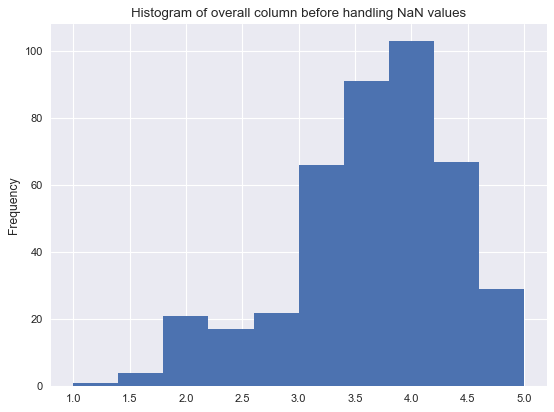

In [582]:
# Plot a histogram for the overall column before handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['overall'].plot(kind="hist", title="Histogram of overall column before handling NaN values");

In [583]:
# Calculate mode
mode = df['overall'].mode()[0]
mode

4.0

In [584]:
# Replace NaN values with mode
df['overall'] = df['overall'].replace(np.NaN, mode)

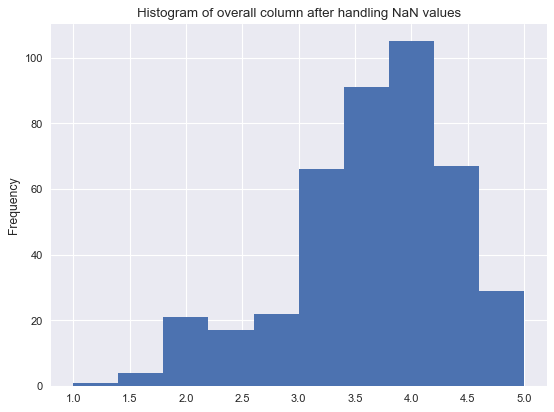

In [585]:
# Plot a histogram for the overall column after handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['overall'].plot(kind="hist", title="Histogram of overall column after handling NaN values");

~ The change in the plot is not obvious because the overall column have only 2 missing values

<h2><font color='#3D3C3A'> Replace NaN values in the Mass (g) column with a choosen value </font></h2>


In [586]:
# Get uniqe values in the Mass (g) column
df['Mass (g)'].unique()

array([ nan, 415., 425., 520., 476., 560., 450., 920., 925., 430., 350.,
       600., 580., 635., 550., 610., 620., 420., 540.])

In [587]:
# Count NaN values in the Mass (g) column 
df['Mass (g)'].isnull().sum()

401

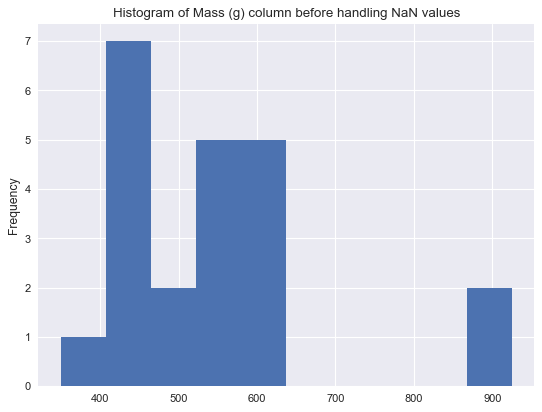

In [588]:
# Plot a histogram for the Mass (g) column before handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Mass (g)'].plot(kind="hist", title="Histogram of Mass (g) column before handling NaN values");

In [589]:
# choosen value 
unknown = -100

In [590]:
# Replace NaN values with the choosen value
df['Mass (g)'] = df['Mass (g)'].replace(np.NaN, unknown)

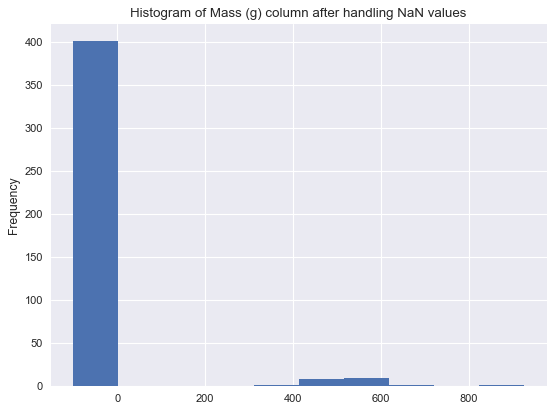

In [591]:
# Plot a histogram for the Mass (g) column after handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Mass (g)'].plot(kind="hist", title="Histogram of Mass (g) column after handling NaN values");

<h2><font color='#3D3C3A'> Replace NaN values in the Cost column useing backwards filling </font></h2>

In [592]:
# Get uniqe values in the Cost column
df['Cost'].unique()

array([ 6.49,  5.45,  4.85,  5.25,  6.59,  6.99,  7.19,  9.25,  6.25,
        9.5 ,  6.95,  7.49,  8.49,  5.99,  6.4 ,  8.75,  5.5 ,  6.  ,
        7.  ,  6.29,  6.6 ,  7.65,  5.  ,  7.84,  7.89,  6.5 ,  7.3 ,
        8.59,  7.99,  9.99,  8.25,  7.95,  7.45,  6.65,  5.95,  9.  ,
        8.  ,  6.89,  6.39,  6.75,  8.95,  7.5 ,  5.55,  7.25, 11.75,
         nan,  7.14,  6.02,  5.4 ,  3.5 , 11.95,  4.87,  4.59,  2.99,
        9.43,  6.35,  7.9 ,  8.5 ,  5.7 ,  9.19,  7.85,  6.85,  6.94,
        4.99,  5.29,  5.69,  3.75,  6.45,  5.79,  7.29,  7.15,  5.49,
        3.99,  6.3 ,  6.1 ,  4.95,  7.35,  6.7 , 10.5 ,  5.65,  7.75,
        4.75,  7.1 , 10.  ,  8.99,  7.4 ,  9.95,  6.9 ,  8.55,  7.8 ,
        5.56,  6.47,  8.35, 25.  ,  8.94, 11.5 ,  4.19,  7.2 ,  7.39])

In [593]:
# Count NaN values in the Cost column 
df['Cost'].isnull().sum()

7

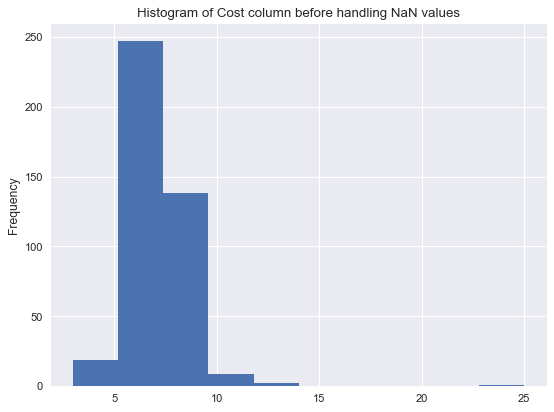

In [594]:
# Plot a histogram for the Cost column before handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Cost'].plot(kind="hist", title="Histogram of Cost column before handling NaN values");

In [595]:
# Backwards filling
df['Cost'].fillna(method="bfill", inplace = True)

In [596]:
# Count NaN values in the Cost column after backward filling
df['Cost'].isnull().sum()

0

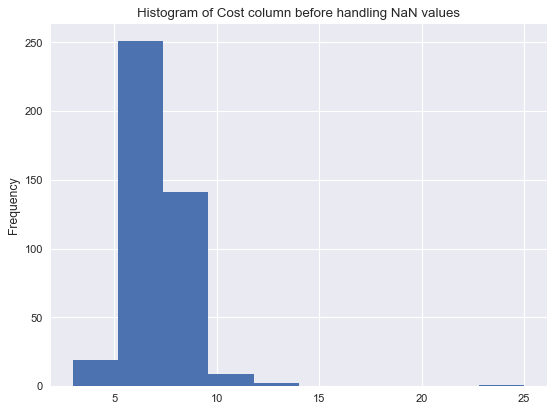

In [597]:
# Plot a histogram for the Cost column after handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Cost'].plot(kind="hist", title="Histogram of Cost column before handling NaN values");

<h2><font color='#3D3C3A'> Replace NaN values in the Hunger column useing backwards filling </font></h2>

In [598]:
# Get uniqe values in the Cost column
df['Hunger'].unique()

array([3.  , 3.5 , 1.5 , 2.  , 4.  , 2.5 , 4.5 , 1.  , 0.5 , 3.75, 5.  ,
       3.2 , 4.3 ,  nan, 2.8 , 2.2 , 4.31, 3.9 , 3.8 , 3.7 , 4.1 , 4.25,
       4.75, 2.3 , 4.2 , 4.4 , 3.3 ])

In [599]:
# Count NaN values in the Cost column 
df['Hunger'].isnull().sum()

3

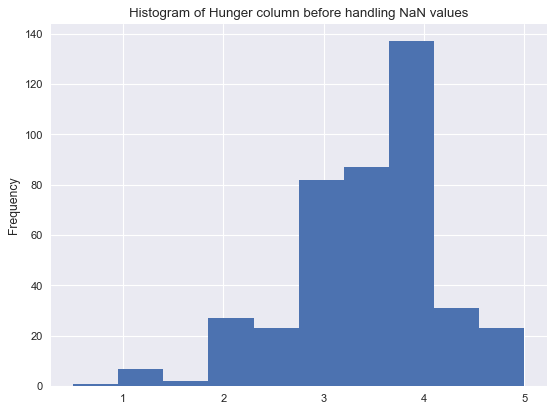

In [600]:
# Plot a histogram for the Hunger column before handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Hunger'].plot(kind="hist", title="Histogram of Hunger column before handling NaN values");

In [601]:
# Forward filling
df['Hunger'].fillna(method="ffill", inplace = True)

In [602]:
# Count NaN values in the Hunger column after Forward filling
df['Hunger'].isnull().sum()

0

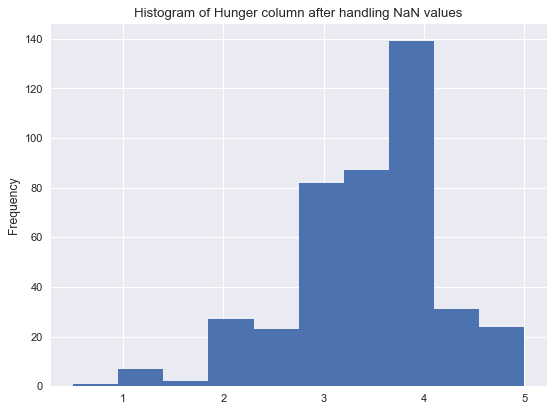

In [603]:
# Plot a histogram for the Hunger column after handling the missing values
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
df['Hunger'].plot(kind="hist", title="Histogram of Hunger column after handling NaN values");

<h1><font color='#3D3C3A'>Bar plot after handling missing values in some colums</font></h1>

Text(0, 0.5, 'Missing Valuses')

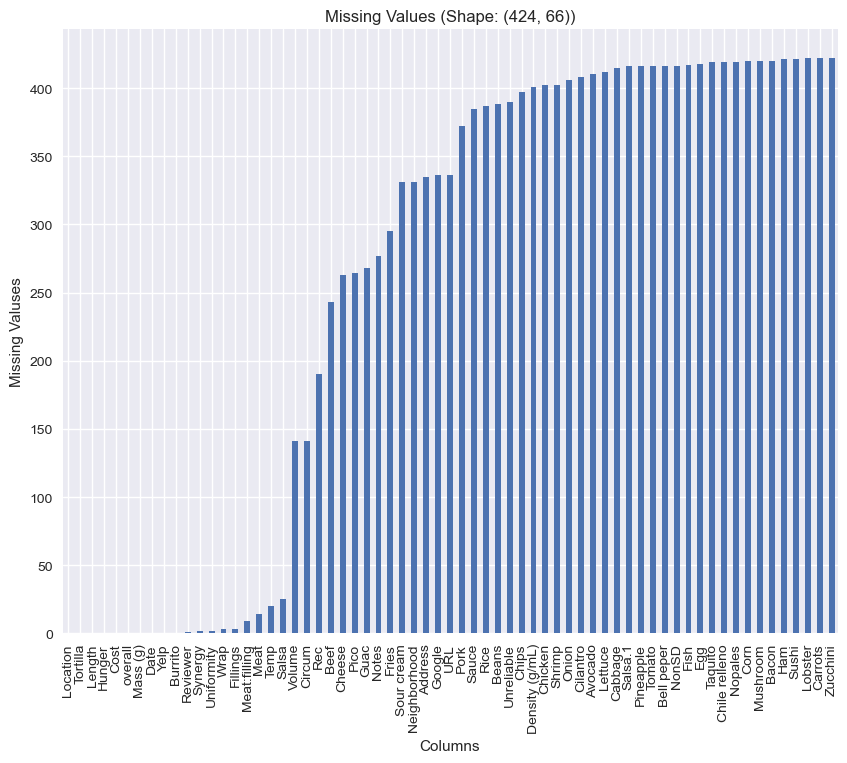

In [604]:
# Look at total NaN values per column graphically
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi = 100)
df.isnull().sum().sort_values().plot(kind='bar', title= 'Missing Values (Shape: (424, 66))');
plt.xlabel('Columns')
plt.ylabel('Missing Valuses')

<h4><font color='#3D3C3A'>By: Nourah Alsaadan</font></h4>